In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load data from a specific simulation

In [8]:
s = "../results/2020-05-14_equilibrate/sim_equilibrate_0009/"

In [9]:
op = pd.read_csv(os.path.join(s, "op.csv"))
og = pd.read_csv(os.path.join(s, "og.csv"))
epoch_df = pd.read_csv(os.path.join(s, "epoch_df.csv"))
epoch_df.index = epoch_df.name

In [10]:
savefig = False

## Plot prevalence

In [47]:
# PREFERENCES
time_limits = [0, 100 * 365]

days_per_year = 365
years_per_major_tick = 5

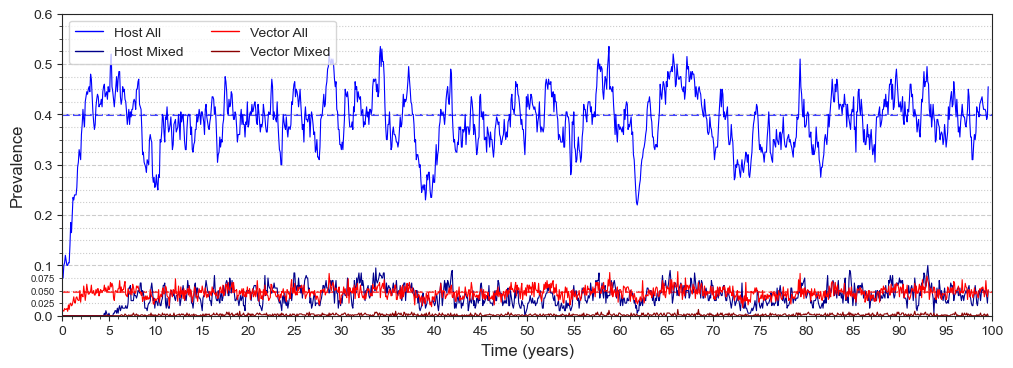

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Epochs and Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)

# Limits
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper left", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/sec1_equilibrium-prevalence.pdf", bbox_inches="tight", pad_inches=0.5)

## Individual genetic diversity statistics

In [49]:
# PREFERENCES
op_alpha = 0.1
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

### Nucleotide diversity

In [50]:
metric = "pi"

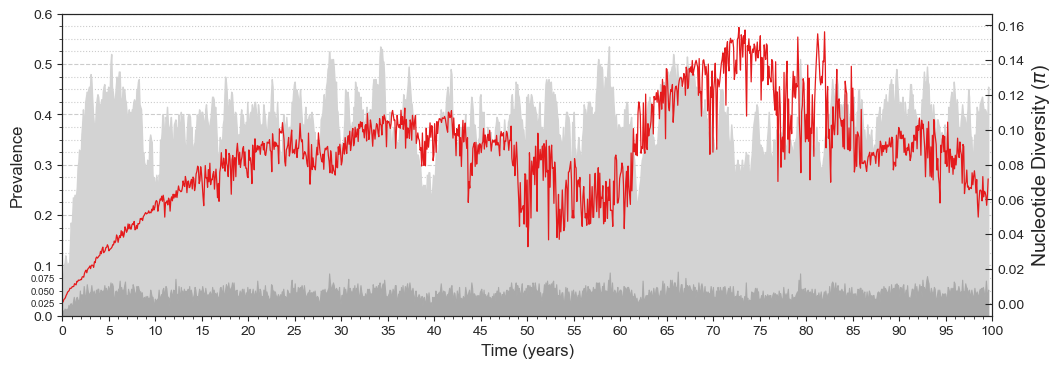

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
# ax.grid(axis="y", linestyle="dashed", zorder=-2)
# ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity
# Twin axis
axm = ax.twinx()
# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)

if savefig:
    fig.savefig("../figs/sec1_equibrium-%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Nucleotide diversity

In [52]:
metric = "mean_k"

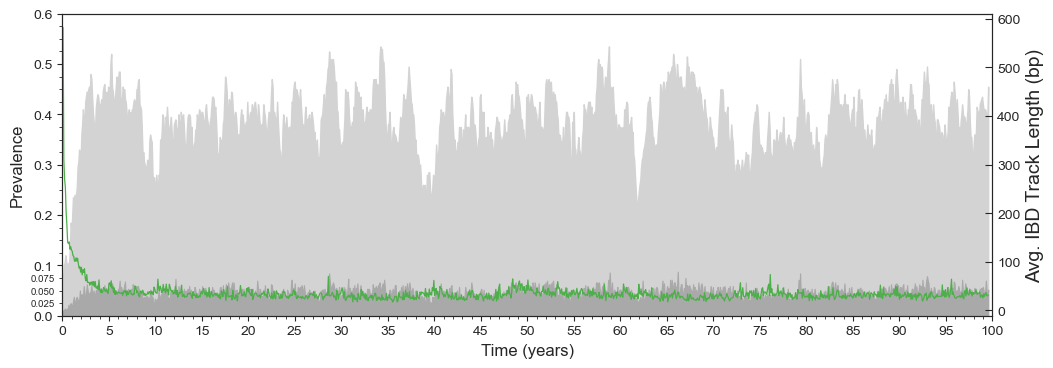

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
# ax.grid(axis="y", linestyle="dashed", zorder=-2)
# ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity
# Twin axis
axm = ax.twinx()
# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)

if savefig:
    fig.savefig("../figs/sec1_equibrium-%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Average IBD Track Length

In [54]:
metric = "avg_l_ibd"

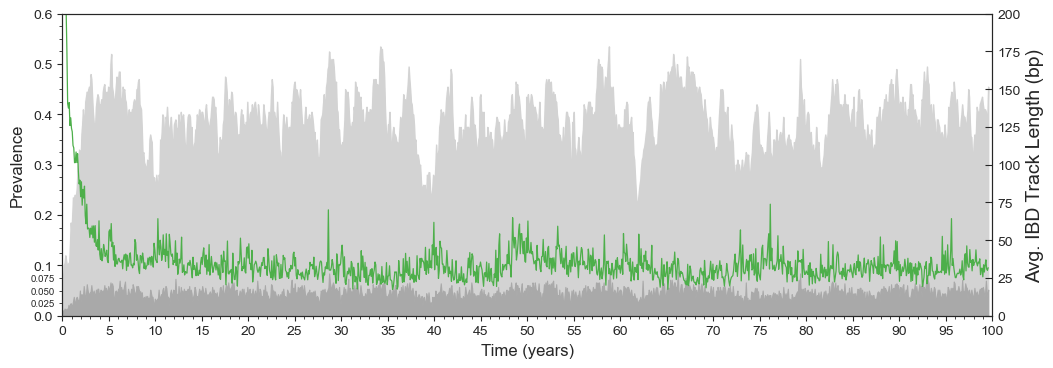

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
# ax.grid(axis="y", linestyle="dashed", zorder=-2)
# ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity
# Twin axis
axm = ax.twinx()
# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
axm.set_ylim([0, 200])

if savefig:
    fig.savefig("../figs/sec1_equibrium-%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Tajima's D

In [62]:
metric = "tajd"

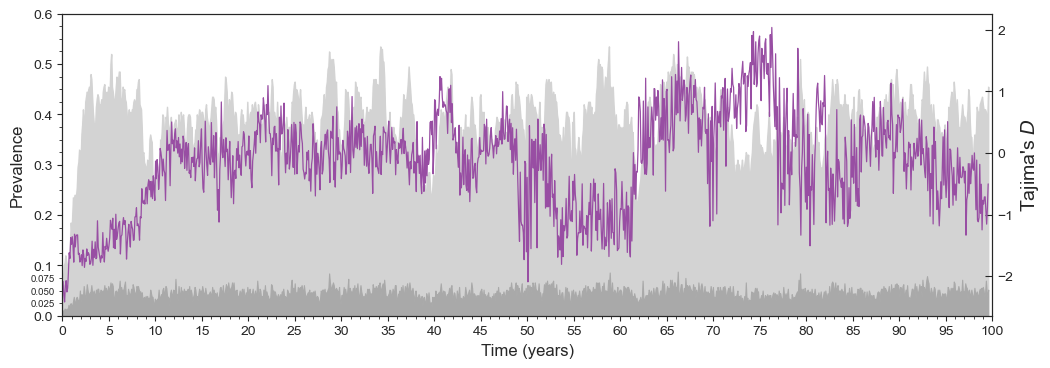

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.plot(op["t0"], op["HX"], color="lightgrey", alpha=op_alpha, linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"], y1=op["HX"], y2=0,
                color="lightgrey", alpha=1.0)
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Limits
ax.set_ylim([0, 0.6])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
# ax.grid(axis="y", linestyle="dashed", zorder=-2)
# ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    
# Plot Genetic Diversity
# Twin axis
axm = ax.twinx()
# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)

if savefig:
    fig.savefig("../figs/sec1_equibrium-%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)

## Other statistics

In [65]:
s = "../results/2020-05-14_equilibrate/sim_equilibrate_0009/"

In [72]:
endpoint = os.path.join(s, "Endpoint")

In [78]:
os.listdir(endpoint)

['pair_r2.npy',
 'unfolded_sfs.npy',
 'pair_d.npy',
 'barcode_counts.npy',
 'hap.npy',
 'ac.npy',
 'k_stats.json',
 'div_stats.json']

In [73]:
sfs = np.load(os.path.join(endpoint, "unfolded_sfs.npy"))

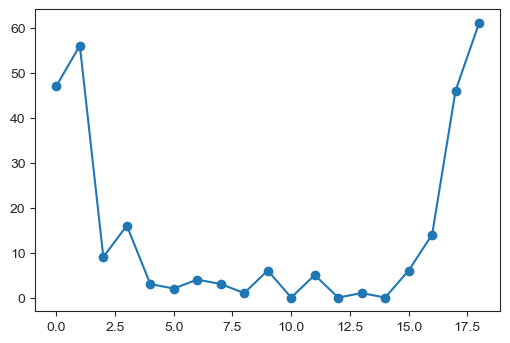

In [77]:
plt.plot(sfs, 'o-')

In [80]:
import json

In [82]:
json.load(open(os.path.join(endpoint, "k_stats.json"), "r"))

{'ks': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'n_re_genomes': 20,
 'n_mixed_genomes': 0,
 'n_re_samples': 20,
 'n_mixed_samples': 0,
 'frac_mixed_genomes': 0.0,
 'frac_mixed_samples': 0.0,
 'mean_k': 1.0}

It does seem like the complexity of infection is a bit low... Why? Prevalence here is 40%.